In [45]:
import json
import numpy as np

items = ["barcode", "black_tea", "tissue", "tea", "maxim"]


In [46]:

logs = []
base_dir = "./dimension_logs/"
methods = ["marker", "board"]

for method in methods:
    _dict = {}
    for item in items:
        for i in ["1", "2"]:
            _dict[f"{item}_{i}"] = {}
            with open(f'{base_dir+method}/dimension_log_{item}_{i}.json', 'r') as f:
                data = json.load(f)
                x_length = data['length']['X'] 
                y_length = data['length']['Y'] 
                z_length = data['length']['Z'] 
                obj_scale_x = data['obj_scale']['X'] 
                obj_scale_y = data['obj_scale']['Y'] 
                obj_scale_z = data['obj_scale']['Z'] 
                x_avg = np.array(x_length).mean()
                y_avg = np.array(y_length).mean()
                z_avg = np.array(z_length).mean()
                x_scale_avg = np.array(obj_scale_x).mean()
                y_scale_avg = np.array(obj_scale_y).mean()
                z_scale_avg = np.array(obj_scale_z).mean()
                
                _dict[f"{item}_{i}"] = {
                    "x_length": x_avg,  
                    "y_length": y_avg,
                    "z_length": z_avg,
                    "x_scale": x_scale_avg,
                    "y_scale": y_scale_avg,
                    "z_scale": z_scale_avg
                }
    logs.append(_dict)



In [47]:
labels = {}

labels['black_tea_2'] = {
    "x_length": 20.5,
    "y_length": 18,
    "z_length": 8,
}

labels['black_tea_1'] = {
    "x_length": 20.5,
    "y_length": 8,
    "z_length": 18,
}

labels['barcode_2'] = {
    "x_length": 23,
    "y_length": 26,
    "z_length": 12,
}

labels['barcode_1'] = {
    "x_length": 26,
    "y_length": 12,
    "z_length": 23,
}

labels['tissue_1'] = {
    "x_length": 11.5,
    "y_length": 7.5,
    "z_length": 23.5,
}

labels['tissue_2'] = {
    "x_length": 11.5,
    "y_length": 23.5,
    "z_length": 7.5,
}

labels['tea_2'] = {
    "x_length": 20,
    "y_length": 20.5,
    "z_length": 8,
}

labels['tea_1'] = {
    "x_length": 20.5,
    "y_length": 8,
    "z_length": 20,
}

labels['maxim_2'] = {
    "x_length": 17.5,
    "y_length": 28,
    "z_length": 14,
}

labels['maxim_1'] = {
    "x_length": 28,
    "y_length": 17.5,
    "z_length": 14,
}





In [48]:
import matplotlib.pyplot as plt
import numpy as np
# 그래프 그리기 전에 폰트 설정 추가
import matplotlib.font_manager as fm

# 나눔고딕 폰트 사용 (시스템에 설치되어 있어야 함)
# plt.rcParams['font.family'] = 'NanumGothic'
# 또는 맑은 고딕 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [49]:
print(len(logs))
logs[0]

2


{'barcode_1': {'x_length': 25.162584033747276,
  'y_length': 6.4924774833341345,
  'z_length': 25.336584221240237,
  'x_scale': 3.876597690582275,
  'y_scale': 0.9996304392814637,
  'z_scale': 3.2869961500167846},
 'barcode_2': {'x_length': 27.68221644630326,
  'y_length': 38.88741726922748,
  'z_length': 18.290656298467166,
  'x_scale': 0.7118554890155793,
  'y_scale': 0.9994052767753601,
  'z_scale': 0.6922071635723114},
 'black_tea_1': {'x_length': 30.93097323388872,
  'y_length': 9.659180018149836,
  'z_length': 34.94876984460484,
  'x_scale': 3.2157151222229006,
  'y_scale': 0.9916945457458496,
  'z_scale': 2.525024580955505},
 'black_tea_2': {'x_length': 17.70055012092272,
  'y_length': 11.134760519995922,
  'z_length': 6.65620546506967,
  'x_scale': 1.5903908252716064,
  'y_scale': 1.0015611171722412,
  'z_scale': 1.0202478528022767},
 'tissue_1': {'x_length': 13.333604163916073,
  'y_length': 6.112611209804632,
  'z_length': 27.02483080442871,
  'x_scale': 2.183253312110901,
  

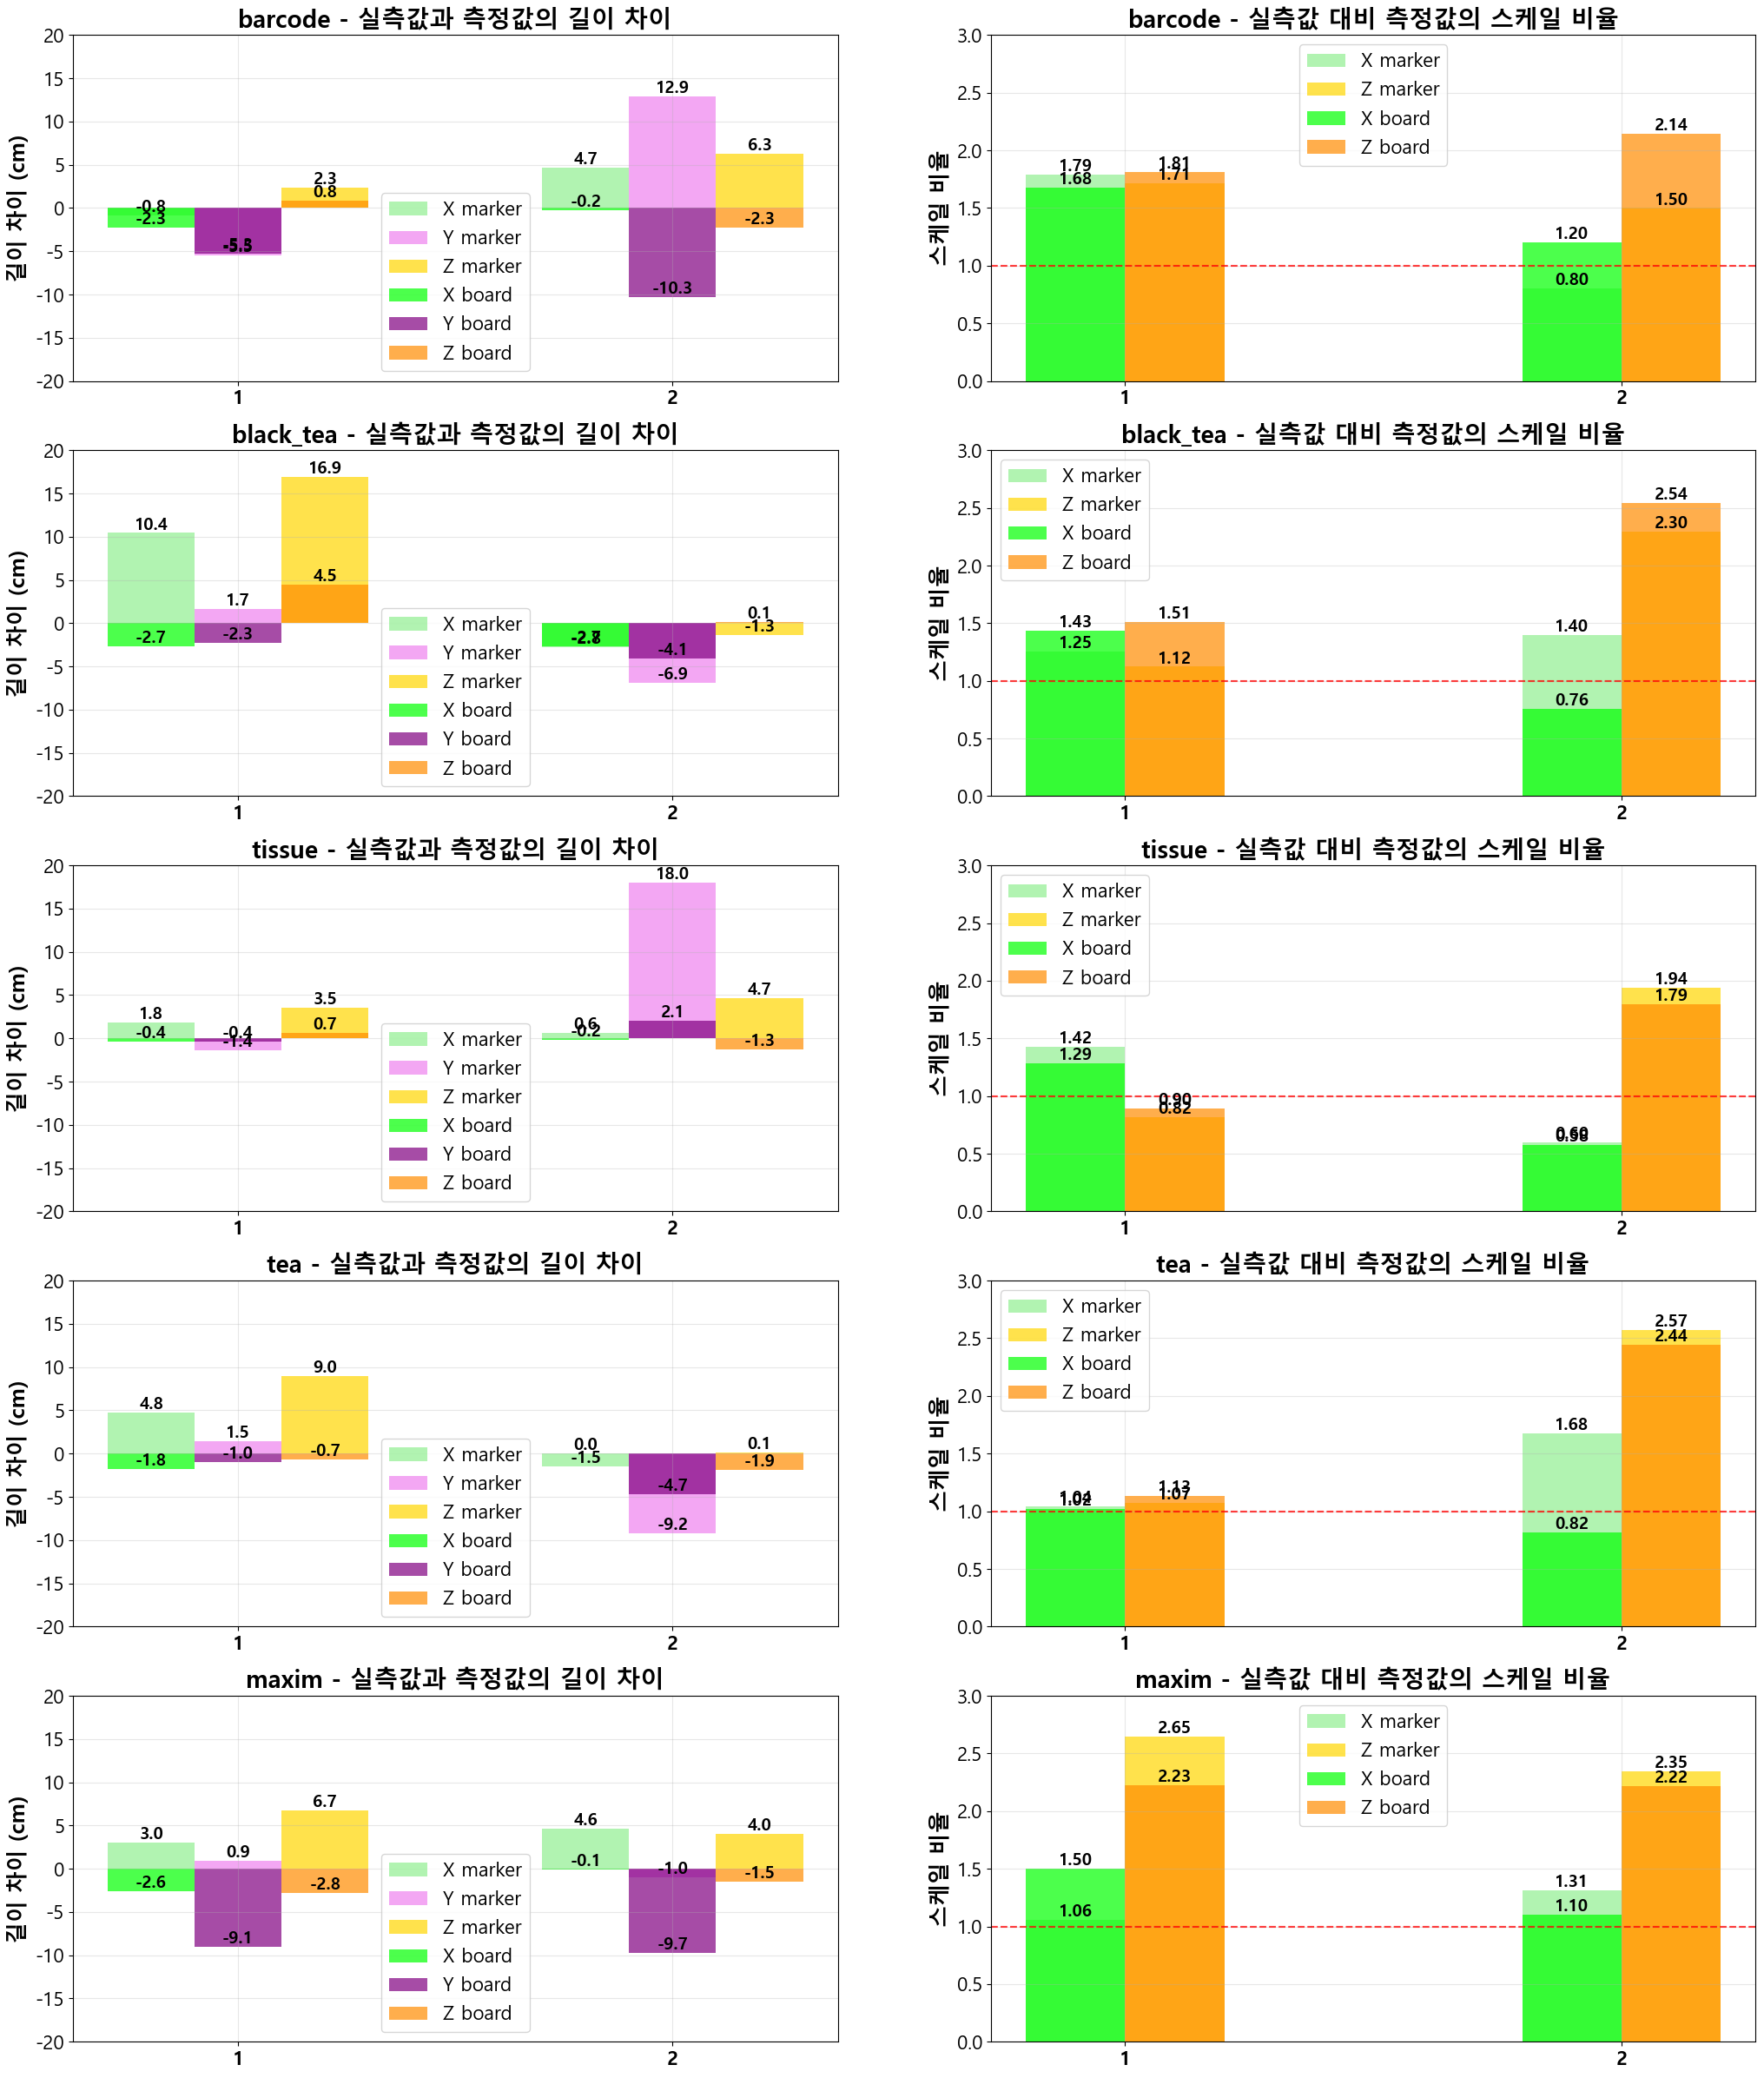

<Figure size 1000x600 with 0 Axes>

In [67]:
# 각 아이템별로 subplot 생성
fig, axes = plt.subplots(len(items), 2, figsize=(25, 30))
# fig.suptitle('박스 측정 결과 분석', fontsize=24)

for idx, item in enumerate(items):
    # 해당 아이템의 데이터 수집
    item_data = [{
        'x_diff': [], 'y_diff': [], 'z_diff': [],
        'x_sim': [], 'y_sim': [], 'z_sim': [],
        'labels': []
    } for _ in range(len(methods))]
    
    for j, method in enumerate(methods):
        for i in ["1", "2"]:
            x_diff = logs[j][item+f"_{i}"]['x_length'] - labels[item+f"_{i}"]['x_length']
            y_diff = logs[j][item+f"_{i}"]['y_length'] - labels[item+f"_{i}"]['y_length']
            z_diff = logs[j][item+f"_{i}"]['z_length'] - labels[item+f"_{i}"]['z_length']

            label_x_scale = labels[item+f"_{i}"]['x_length'] / labels[item+f"_{i}"]['y_length']
            label_z_scale = labels[item+f"_{i}"]['z_length'] / labels[item+f"_{i}"]['y_length']

            x_scale_ratio_sim = logs[j][item+f"_{i}"]['x_scale'] / label_x_scale
            z_scale_ratio_sim = logs[j][item+f"_{i}"]['z_scale'] / label_z_scale
            
            # 데이터 저장
            item_data[j]['x_diff'].append(x_diff)
            item_data[j]['y_diff'].append(y_diff)
            item_data[j]['z_diff'].append(z_diff)
            item_data[j]['x_sim'].append(x_scale_ratio_sim)
            item_data[j]['z_sim'].append(z_scale_ratio_sim)
            item_data[j]['labels'].append(f"{i}")

        # 길이 차이 그래프
        x = np.arange(len(item_data[j]['labels']))
        width = 0.2  # 바 너비를 0.25에서 0.2로 감소

        # 길이 차이 그래프의 바 생성
        if j == 0:
            x_bars = axes[idx, 0].bar(x - width, item_data[j]['x_diff'], width, label=f'X {method}', color='lightgreen', alpha=0.7)
            y_bars = axes[idx, 0].bar(x, item_data[j]['y_diff'], width, label=f'Y {method}', color='violet', alpha=0.7)
            z_bars = axes[idx, 0].bar(x + width, item_data[j]['z_diff'], width, label=f'Z {method}', color='gold', alpha=0.7)
        else:
            x_bars = axes[idx, 0].bar(x - width, item_data[j]['x_diff'], width, label=f'X {method}', color='lime', alpha=0.7)
            y_bars = axes[idx, 0].bar(x, item_data[j]['y_diff'], width, label=f'Y {method}', color='purple', alpha=0.7)
            z_bars = axes[idx, 0].bar(x + width, item_data[j]['z_diff'], width, label=f'Z {method}', color='darkorange', alpha=0.7)

        # 각 바 위에 수치 표시
        for bars in [x_bars, y_bars, z_bars]:
            for bar in bars:
                height = bar.get_height()
                axes[idx, 0].text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.1f}',
                                ha='center', va='bottom', fontsize=14, weight='bold')

        axes[idx, 0].set_ylabel('길이 차이 (cm)', fontsize=18, weight='bold')
        axes[idx, 0].set_title(f'{item} - 실측값과 측정값의 길이 차이', fontsize=20, weight='bold')
        axes[idx, 0].set_xticks(x)
        axes[idx, 0].set_xticklabels(item_data[j]['labels'], fontsize=16, weight='bold')
        axes[idx, 0].tick_params(axis='y', labelsize=16)
        axes[idx, 0].legend(fontsize=16)
        axes[idx, 0].set_ylim(-20, 20)
        axes[idx, 0].grid(True, alpha=0.3)

        # 스케일 유사도 그래프
        if j == 0:
            x_sim_bars = axes[idx, 1].bar(x - width/2, item_data[j]['x_sim'], width, label=f'X {method}', color='lightgreen', alpha=0.7)
            z_sim_bars = axes[idx, 1].bar(x + width/2, item_data[j]['z_sim'], width, label=f'Z {method}', color='gold', alpha=0.7)
        else:
            x_sim_bars = axes[idx, 1].bar(x - width/2, item_data[j]['x_sim'], width, label=f'X {method}', color='lime', alpha=0.7)
            z_sim_bars = axes[idx, 1].bar(x + width/2, item_data[j]['z_sim'], width, label=f'Z {method}', color='darkorange', alpha=0.7)
        axes[idx, 1].axhline(y=1.0, color='r', linestyle='--', alpha=0.5)

        # 스케일 유사도 그래프에 수치 표시
        for bars in [x_sim_bars, z_sim_bars]:
            for bar in bars:
                height = bar.get_height()
                axes[idx, 1].text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.2f}',
                                ha='center', va='bottom', fontsize=14, weight='bold')

        axes[idx, 1].set_ylabel('스케일 비율', fontsize=18, weight='bold')
        axes[idx, 1].set_title(f'{item} - 실측값 대비 측정값의 스케일 비율', fontsize=20, weight='bold')
        axes[idx, 1].set_xticks(x)
        axes[idx, 1].set_xticklabels(item_data[j]['labels'], fontsize=16, weight='bold')
        axes[idx, 1].tick_params(axis='y', labelsize=16)
        axes[idx, 1].set_ylim(0, 3)
        axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].legend(fontsize=16)

# 모든 item들의 전체 평균 길이 차이를 보여주는 그래프
plt.figure(figsize=(10, 6))





plt.tight_layout()
plt.show()

In [61]:
item_data

[{'x_diff': [3.0482286129176757, 4.5902047461919935],
  'y_diff': [0.9300875723112156, -1.0216250717225428],
  'z_diff': [6.730627250171921, 4.010429360740943],
  'x_sim': [1.0578780844807625, 1.3103070163726807],
  'y_sim': [],
  'z_sim': [2.6479803621768947, 2.3457455158233644],
  'labels': ['1', '2']},
 {'x_diff': [-2.5934152438090585, -0.10336683932980506],
  'y_diff': [-9.05728540637389, -9.729836371360314],
  'z_diff': [-2.7643731817780246, -1.5282687896993394],
  'x_sim': [1.5025422424077988, 1.0999253845214843],
  'y_sim': [],
  'z_sim': [2.2250984162092204, 2.2202794551849365],
  'labels': ['1', '2']}]

In [69]:
methods

['marker', 'board']

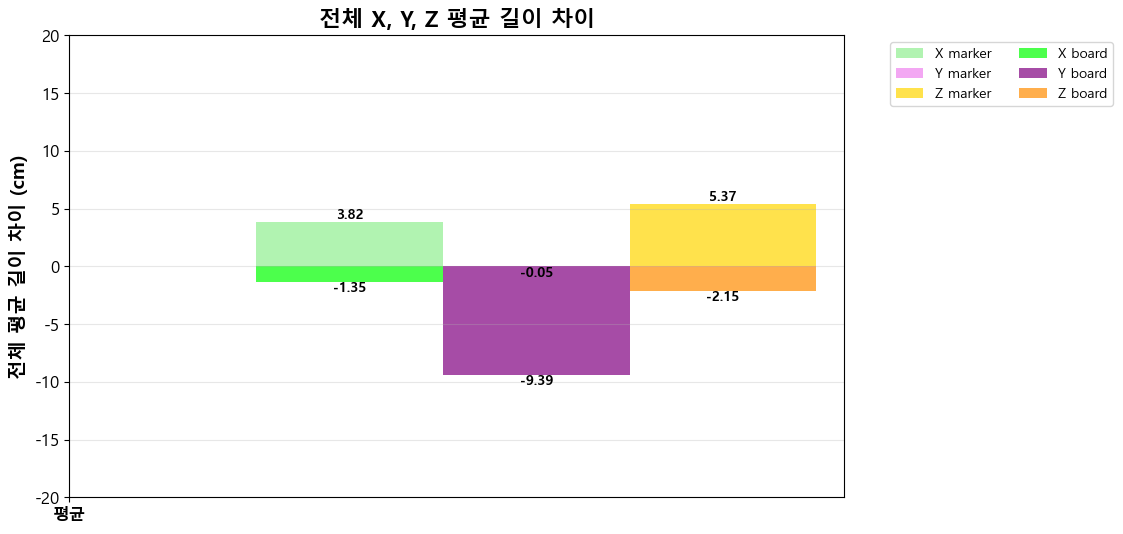

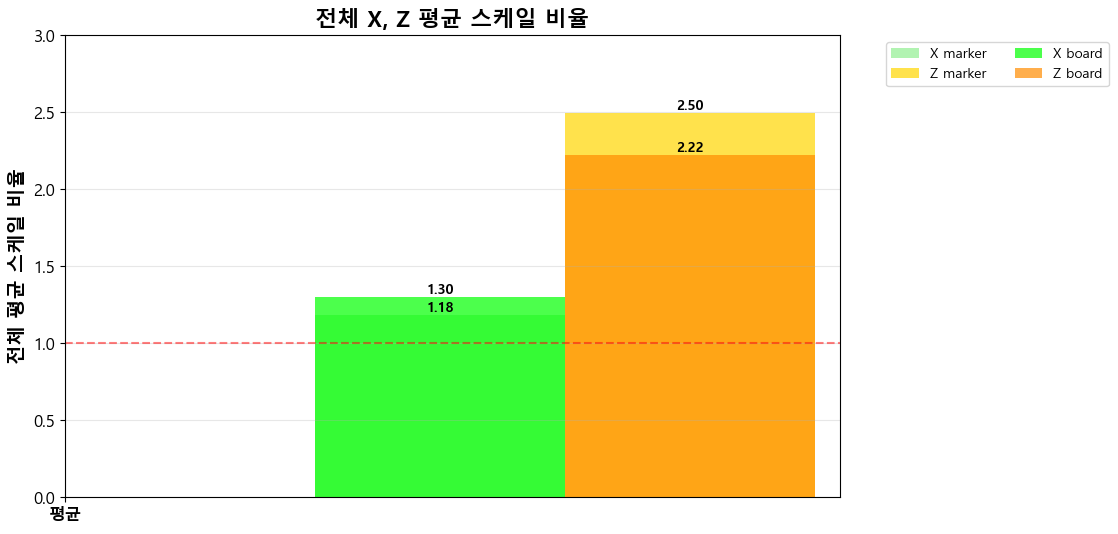

In [74]:
# 전체 평균 계산
total_means = {}
total_scales = {}
for i, method in enumerate(methods):
    x_diffs = []
    y_diffs = []
    z_diffs = []
    x_sims = []
    y_sims = []
    z_sims = []
    
    x_diffs.extend(item_data[i]['x_diff'])
    y_diffs.extend(item_data[i]['y_diff'])
    z_diffs.extend(item_data[i]['z_diff'])
    x_sims.extend(item_data[i]['x_sim'])
    y_sims.extend(item_data[i]['y_sim'])
    z_sims.extend(item_data[i]['z_sim'])
    
    total_means[method] = {
        'x_mean': np.mean(x_diffs),
        'y_mean': np.mean(y_diffs),
        'z_mean': np.mean(z_diffs)
    }
    total_scales[method] = {
        'x_mean': np.mean(x_sims),
        'y_mean': np.mean(y_sims) if y_sims else 0,
        'z_mean': np.mean(z_sims)
    }

# 길이 차이 그래프
plt.figure(figsize=(10, 6))
x = np.arange(1)
width = 0.15

bars = []
for i, method in enumerate(methods):
    x_bar = plt.bar(x - width*1.5 + width*3, total_means[method]['x_mean'], width, 
            label=f'X {method}', 
            color='lightgreen' if i == 0 else 'lime', 
            alpha=0.7)
    y_bar = plt.bar(x - width*0.5 + width*3, total_means[method]['y_mean'], width, 
            label=f'Y {method}', 
            color='violet' if i == 0 else 'purple', 
            alpha=0.7)
    z_bar = plt.bar(x + width*0.5 + width*3, total_means[method]['z_mean'], width, 
            label=f'Z {method}', 
            color='gold' if i == 0 else 'darkorange', 
            alpha=0.7)
    bars.extend([x_bar, y_bar, z_bar])

# 수치 표시 추가
for bar_container in bars:
    for bar in bar_container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom' if height >= 0 else 'top',
                fontsize=10, weight='bold')

plt.ylabel('전체 평균 길이 차이 (cm)', fontsize=14, weight='bold')
plt.title('전체 X, Y, Z 평균 길이 차이', fontsize=16, weight='bold')
plt.xticks(x, ['평균'], fontsize=12, weight='bold')
plt.yticks(fontsize=12)
plt.legend(fontsize=10, ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(-20, 20)
plt.show()

# 스케일 비율 그래프
plt.figure(figsize=(10, 6))
bars = []
for i, method in enumerate(methods):
    x_bar = plt.bar(x - width/2 + width*2, total_scales[method]['x_mean'], width, 
            label=f'X {method}', 
            color='lightgreen' if i == 0 else 'lime', 
            alpha=0.7)
    z_bar = plt.bar(x + width/2 + width*2, total_scales[method]['z_mean'], width, 
            label=f'Z {method}', 
            color='gold' if i == 0 else 'darkorange', 
            alpha=0.7)
    bars.extend([x_bar, z_bar])

plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.5)

# 수치 표시 추가
for bar_container in bars:
    for bar in bar_container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom',
                fontsize=10, weight='bold')

plt.ylabel('전체 평균 스케일 비율', fontsize=14, weight='bold')
plt.title('전체 X, Z 평균 스케일 비율', fontsize=16, weight='bold')
plt.xticks(x, ['평균'], fontsize=12, weight='bold')
plt.yticks(fontsize=12)
plt.legend(fontsize=10, ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, 3)
plt.show()